In [2]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
%matplotlib inline

In [20]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJ2'), ['1', '2'])
FQ3JJ.add_element(QCapacitance('C'), ['GND', '1'])
        
phi = QVariable('φ')
phixH = QVariable('φxH')
phixE = QVariable('φxE')
#phix2 = QVariable('φx2')
phi.create_grid(32, 1)
FQ3JJ.add_variable(phi)
FQ3JJ.add_variable(phixH)
FQ3JJ.add_variable(phixE)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2'], 
                       ['φ', 'φxH', 'φxE'], 
                       np.asarray([[0,0,1],[1,0,0],[0,1,1]]))

#EjEc_ratio = 80
flux_steps = 1
voltage_steps = 128
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((voltage_steps,4), dtype=np.float)

Ej = 20e9
Ec = 1.9e-19**2/100e-15/(2*2*np.pi*1.054e-34)
# Ec = 1e9*8
FQ3JJ.find_element('JJ1').set_critical_current(Ej)
FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('C').set_capacitance(1/(8*Ec))
phixH_value = np.pi*2/3
# for ng_id, ng in enumerate(np.linspace(-2, 2, voltage_steps)):
#     phi.create_grid(32, 1, centre_charge=ng)
for UxE_id, UxE_value in enumerate(np.linspace(-2, 2, voltage_steps)/2*Ec):
#for phix_id, phix_value in enumerate(np.linspace(-0.5*np.pi, 0.5*np.pi, flux_steps)):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phixH.set_parameter(phixH_value, 0)
    phixE.set_parameter(0, UxE_value)
#     phixE.set_parameter(0, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[UxE_id, :] = eigenenergies
#     energies[UxE_id, :] = eigenenergies
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Users\iliab\AppData\Local\Temp\ipykernel_4928\917644086.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  energies = np.zeros((voltage_steps,4), dtype=np.float)
C:\Users\iliab\AppData\Local\Temp\ipykernel_4928\917644086.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[UxE_id, :] = eigenenergies


In [21]:
Ec/1e9

0.27255661506724005

In [22]:
FQ3JJ.capacitance_matrix_legendre_transform()

array([[ 2.18045292e+09, -0.00000000e+00,  1.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  4.58620313e-10]])

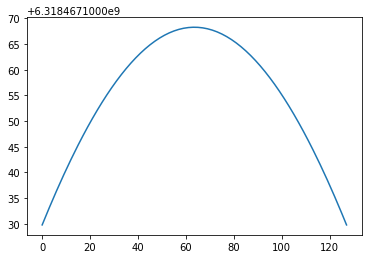

In [23]:
plt.plot((energies[:,1]-energies[:,0]))
# plt.plot((energies[:,2]-energies[:,1]))
#plt.plot((energies[:,3]-energies[:,2]))

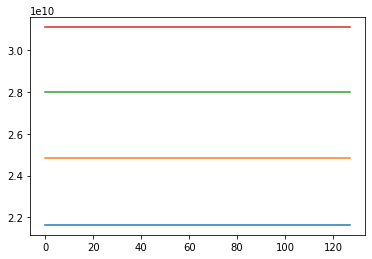

In [35]:
plt.plot(energies)

In [36]:
np.real(FQ3JJ.get_charge_operator(eigenfunctions, phi))

array([[-2.00000000e+00,  9.92233904e-01, -1.00058850e-14,
        -9.73663626e-03],
       [ 9.92233904e-01, -2.00000000e+00,  2.38662643e+00,
         1.80815085e-12],
       [-1.00058850e-14,  2.38662643e+00, -2.00000000e+00,
         1.11186535e+00],
       [-9.73663626e-03,  1.80806758e-12,  1.11186535e+00,
        -2.00000000e+00]])

In [37]:
np.real(FQ3JJ.get_phase_operator(eigenfunctions, phi))

array([[ 1.04719755e+00,  2.37311791e-01,  2.04313462e-09,
         1.21240120e-03],
       [ 2.37311791e-01,  1.04719755e+00, -5.48401212e-02,
         5.16021596e-08],
       [ 2.04313463e-09, -5.48401212e-02,  1.04719742e+00,
         4.75682906e-01],
       [ 1.21240120e-03,  5.16021596e-08,  4.75682906e-01,
         1.04719513e+00]])

C:\Users\iliab\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\iliab\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


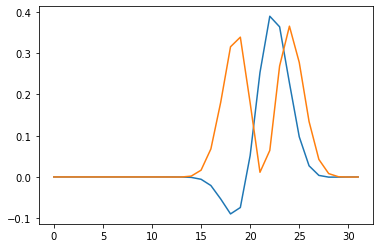

In [38]:
plt.plot(eigenfunctions[..., 0].ravel())
plt.plot(eigenfunctions[..., 1].ravel())

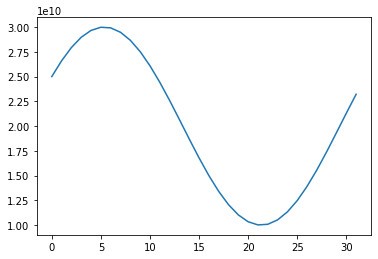

In [31]:
plt.plot(FQ3JJ.phase_potential.ravel())